# LOAD DATA

Dalam melakukan proses data mining, terlebih dahulu kita perlu meload data yang akan kita gunakan. Jika menggunakan tools google colab, kita akan melakukan penyimpanan dataset dan melatih model di cloud. Untuk itu, kita perlu memasang (*mount*) google drive penyimpanan data kita pada google colab dengan menggunakan instruksi berikut

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import library yang akan digunakan yaitu pandas dan numpy. Library Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data. Sedangkan library NumPy (Numerical Python) adalah library Python yang fokus pada scientific computing. NumPy memiliki kemampuan untuk membentuk objek N-dimensional array, yang mirip dengan list pada Python.

In [1]:
import pandas as pd
import numpy as np 
from numpy.core.defchararray import add

Selanjutnya kita dapat meload data dengan menggunakan fungsi read_csv dari library Pandas yang akan digunakan untuk membaca file atau dataset yang akan kita gunakan. Kita perlu menyertakan path drive penyimpanan dataset kita seperti yang ditunjukkan pada code dibawah ini

In [2]:
df = pd.read_csv("./fraud_detection_train.csv")

# DATA UNDERSTANDING

Tahap selanjutnya adalah Data Understanding. Data understanding merupakan tahapan yang bertujuan untuk mendapatkan pemahaman awal mengenai data yang dibutuhkan untuk
memecahkan permasalahan bisnis yang diberikan. Permasalahan bisnsi yang terdefinisi dengan baik berperan sebagai dasar untuk menentukan data apa saja yang dibutuhkan. 
Dengan melakukan tahapan data understanding, kita dapat melihat gambaran atas bentuk, kelemahan atau kekurangan data kita.

Kita dapat memahami data dengan terlebih dahulu melihat ukuran dan shape dari data kita. Info size menunjukkan jumlah bidang dalam *dataframe* yang merupakan jumlah baris x jumlah kolom. Info shape akan menunjukkan jumlah baris dan jumlah kolom *dataframe* yang kita gunakan

In [3]:
df.size

10611501

In [4]:
df.shape

(200217, 53)

Dari nilai property size yang ditunjukkan bahwa *dataframe* memiliki seanayak 10.611.501 field dan dari nilai shape yang terlihat diatas, memberikan informasi bahwa *dataframe* memiliki 200217 baris/record dan 53 kolom.

Selanjutnya kita dapat mengetahui informasi lebih detail mengenai struktur *dataframe* yang kita gunakan menggunakan code dibawah ini. 

In [5]:
# melihat type atribut
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   visit_id       200217 non-null  int64 
 1   kdkc           200217 non-null  int64 
 2   dati2          200217 non-null  int64 
 3   typeppk        200217 non-null  object
 4   jkpst          200217 non-null  object
 5   umur           200217 non-null  int64 
 6   jnspelsep      200217 non-null  int64 
 7   los            200217 non-null  int64 
 8   cmg            200217 non-null  object
 9   severitylevel  200217 non-null  int64 
 10  diagprimer     200217 non-null  object
 11  dx2_a00_b99    200217 non-null  int64 
 12  dx2_c00_d48    200217 non-null  int64 
 13  dx2_d50_d89    200217 non-null  int64 
 14  dx2_e00_e90    200217 non-null  int64 
 15  dx2_f00_f99    200217 non-null  int64 
 16  dx2_g00_g99    200217 non-null  int64 
 17  dx2_h00_h59    200217 non-null  int64 
 18  dx2_

Berdasarkan code tersebut kita dapat mengetahui kolom apa saja yang tersedia pada *dataframe* yang kita gunakan yaitu sebanyak 53 kolom. Selain itu ditampilkan total nilai *not-null* yaitu sebanyak 200217. Dari nilai itu kita mengetahui bahwa total nilai *not-null* sama dengan jumlah row yang telah kita lihat pada code sebelumnya, menunjukkan bahwa tidak ada row berisi nilai *null* pada *dataframe* kita. Kita juga mengetahui terdapat 2 tipe data yang digunakan pada data ini yaitu object dan integer

Kita dapat melihat bagaimana konten atau isi dari data yang kita gunakan dengan fungsi head(). Dengan fungsi ini akan menampilkan 5 row pertama untuk setiap field pada *dataframe* yaitu sebagai berikut.

In [6]:
df.head()

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,...,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1


Selanjutnya untuk mengetahui nilai unik di sepanjang sumbu (*axis*) kolom kita akan menggunakan fungsi nunique() yang akan memprint total nilai unik di setiap baris.

In [7]:
df.nunique() 

visit_id         200217
kdkc                126
dati2               486
typeppk              25
jkpst                 2
umur                105
jnspelsep             2
los                 142
cmg                  23
severitylevel         4
diagprimer           21
dx2_a00_b99           5
dx2_c00_d48           4
dx2_d50_d89           4
dx2_e00_e90           7
dx2_f00_f99           3
dx2_g00_g99           5
dx2_h00_h59           5
dx2_h60_h95           4
dx2_i00_i99           7
dx2_j00_j99           5
dx2_koo_k93           1
dx2_l00_l99           4
dx2_m00_m99           4
dx2_n00_n99           5
dx2_o00_o99           7
dx2_p00_p96          14
dx2_q00_q99           7
dx2_r00_r99           5
dx2_s00_t98           8
dx2_u00_u99           1
dx2_v01_y98           3
dx2_z00_z99           6
proc00_13             5
proc14_23             6
proc24_27             4
proc28_28             3
proc29_31             3
proc_32_38            6
proc39_45             5
proc46_51             4
proc52_57       

Berdasarkan hasil tersebut kita melihat nilai unik paling banyak ditunjukkan oleh visit_id karena setiap id yang dimiliki setiap row pasti berbeda. Sehingga jumlah nilai unik id akan sama dengan jumlah semua row yang ada pada *dataframe*. Selain itu kita melihat bahwa terdapat kolom dengan nilai unique yang sedikit seperti 1 dan 2. Hal ini menunjukkan bahwa kolom tersebut adalah tipe true dan false

Selanjutnya kita akan melihat apakah data yang kita miliki sudah bersih dari kasus seperti *noisy*, *missing value*, dan masalah lainnya. Yang pertama kita akan melihat apakah terdapat nilai yang hilang *missing*. Pada code yang akan kita gunakan adalah dengan menggunakan fungsi isnull() yang akan mengembalikan jumlah row dengan nilai *null* dan kemudian dibagikan dengan shape dari data yang kita miliki. Keluaran yang akan kita dapatkan adalah persentasi nilai yang hilang sebelum dilakukan pembersihan

In [8]:
#checking null value
C = (df.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (df.dtypes == 'int64')
Float = (df.dtypes == 'float64')
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

Missing_Percentage = (df.isnull().sum()).sum()/np.product(df.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 0.0 %


Berdasarkan hasil output, kita mengetahui bahwa persentasi *missing value* pada data yang kita gunakan adalah sebeasr 0% yaitu sama sekali tidak ada. 

Berikutnya kita menggunakan visualisasi data dengan memanfaatkan fungsi hist untu menampilkan histogram untuk semua atribut. Histogram dalam tampilan bentuk grafis akan menunjukkan distribusi data secara visual atau seberapa sering suatu nilai yang berbeda itu terjadi dalam suatu kumpulan data (*dataframe*).  Histogram menunjukkan distribusi data dengan memplot frekuensi kejadian dalam suatu rentang.

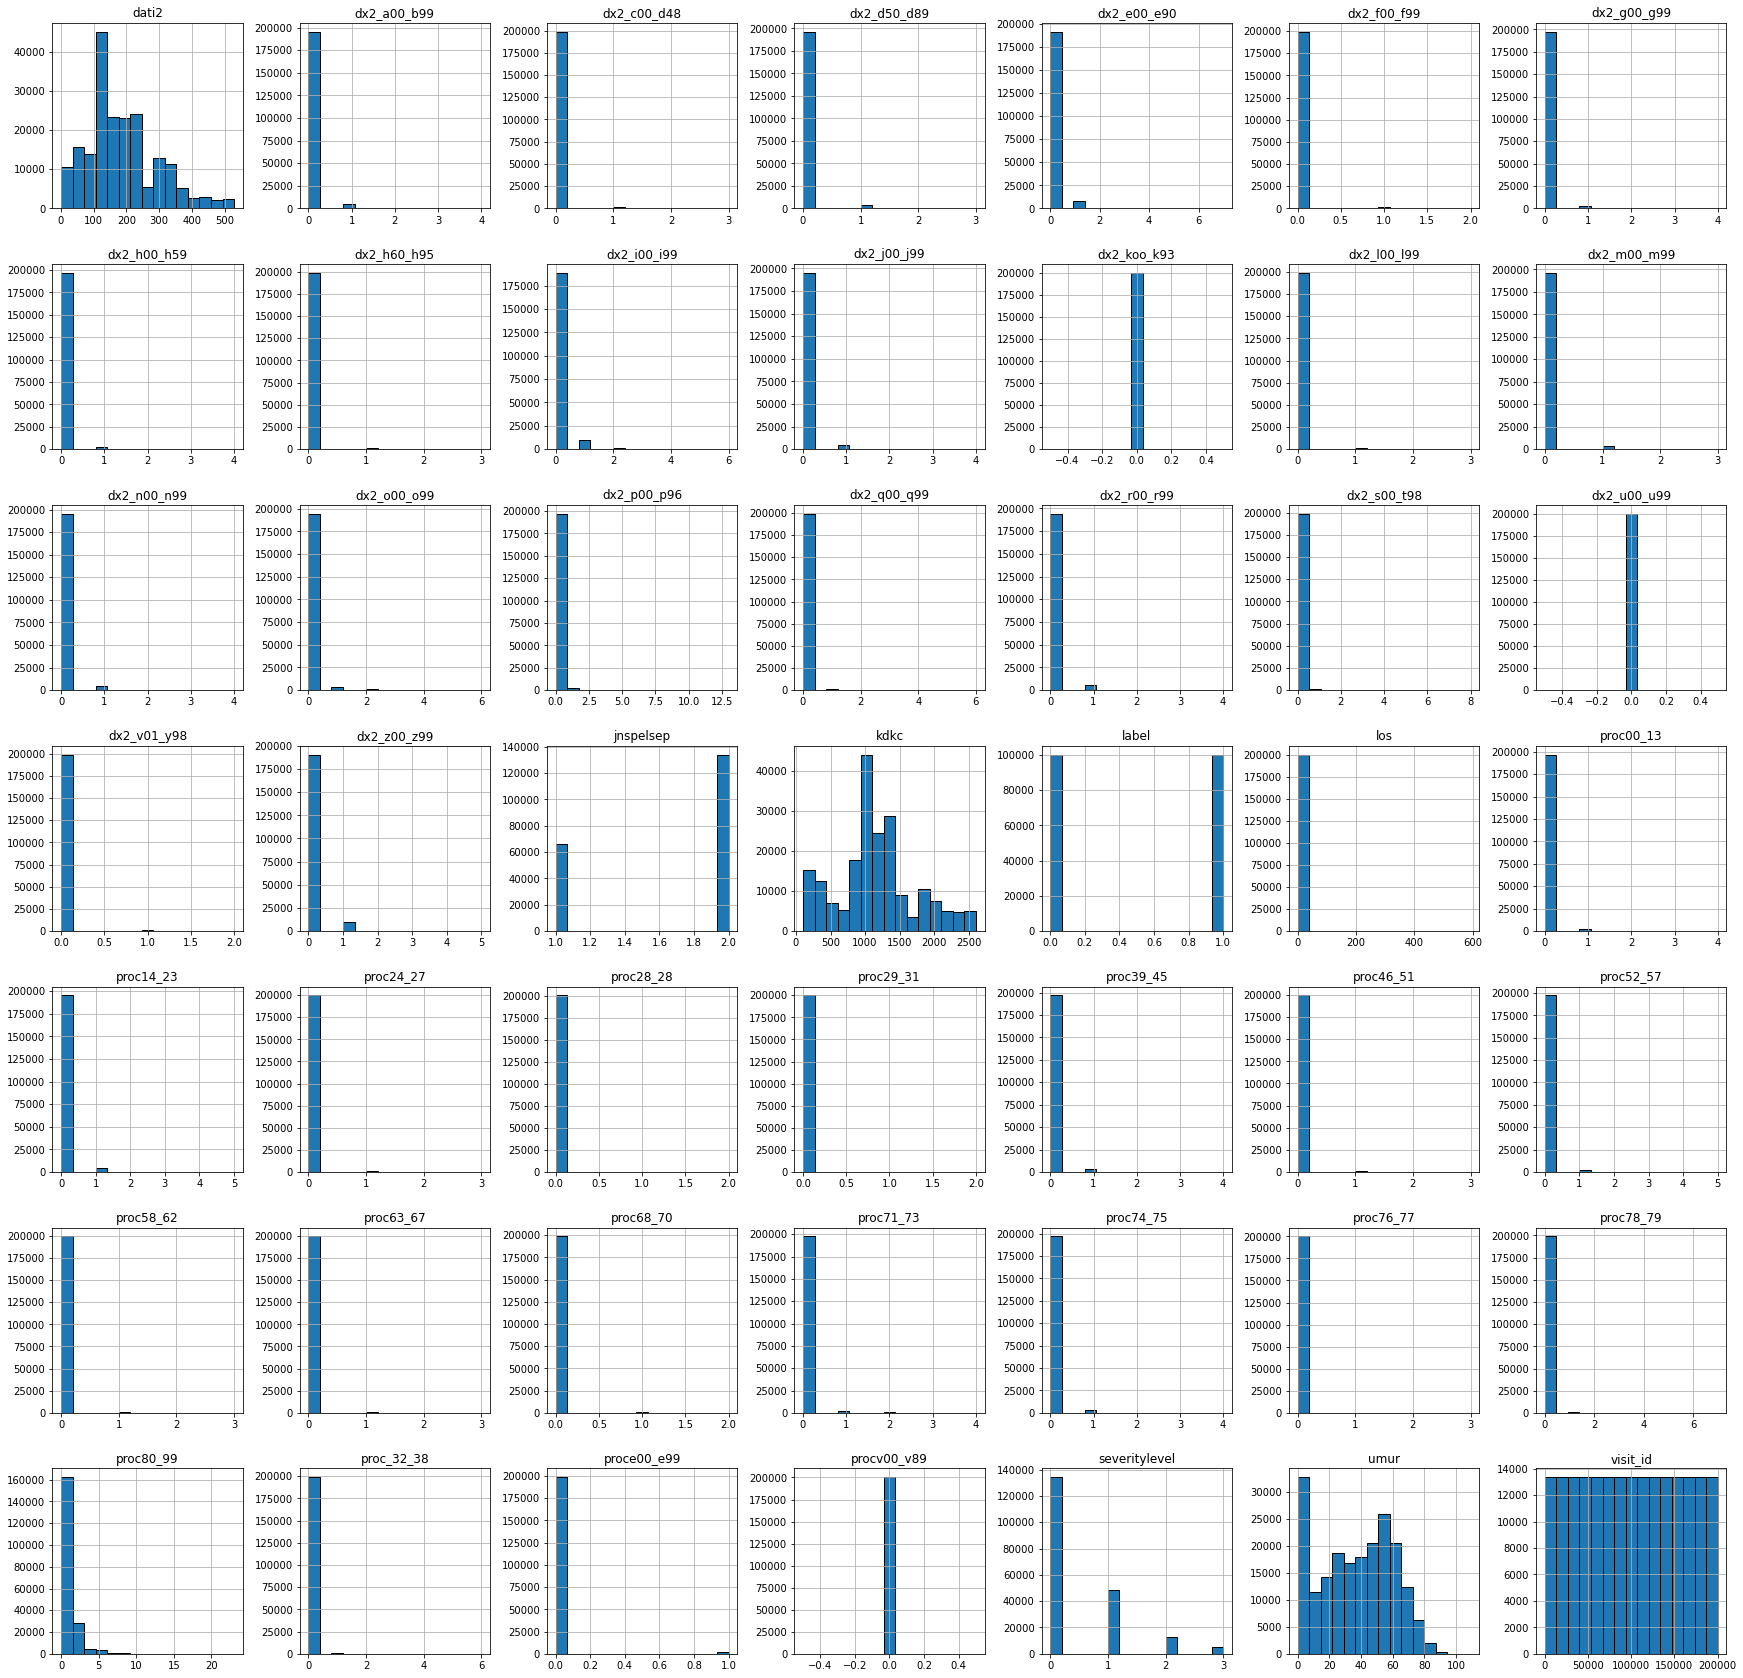

In [9]:
## menampilkan  histogram untuk semua atribut
df.hist(edgecolor = 'black', bins = 15, figsize = (30, 30));

Berdasarkan hasil histogram yang ditunjukkan pada output tersebut, kita mengetahui bahwa kolom yang memiliki variasi data pada frekuensi tertentu adalah kdkc,dati2, dan umur. Namun persebaran atau distribusi data tidak tersebar secara konsisten. Kolom **kdkc** yang menunjukkan kode kantor cabang BPJS yang paling banyak adalah pada code di rentang 1000. Sementara pada kolom **dati2** yang menunjukkan code kabupaten, paling tinggi berada pada rentang 100-200. Dan untuk kolom **umur**, nilai yang paling tinggi berada pada rentang umur 0.

## MELIHAT KORELASI ANTAR DATA

Kita telah melakukan proses data understanding untuk memahami bagaimana tipe, bentuk, hingga persebaran data yang kita gunakan. Untuk pemahaman yang lebih baik kita akan melihat keterhubungan dalam data yang ada, dan bagaimana kita memanfaatkannya untuk dapat mengatasi permasalahan bisnis yang akan kita selesaikan. 

Pada kolom severity level yang akan menunjukkan tingkat urgensi rawat pasien (keparahan kasus) yaitu terbagi menjadi 4 nilai yaitu 0 - 3. Keparahan kasus dalam INA-CBG terbagi menjadi :

1.   “0” Untuk Rawat jalan
2.   “I - Ringan” untuk rawat inap dengan tingkat keparahan 1 (tanpa 
komplikasi maupun komorbiditi)
3.   “II - Sedang” Untuk rawat inap dengan tingkat keparahan 2 (dengan
mild komplikasi dan komorbiditi)
4.   “III - Berat” Untuk rawat inap dengan tingkat keparahan 3 (dengan 
major komplikasi dan komorbiditi

Kita akan menggunakan visualisasi data *pie chart* yang menampilkan value count untuk setiap kelas

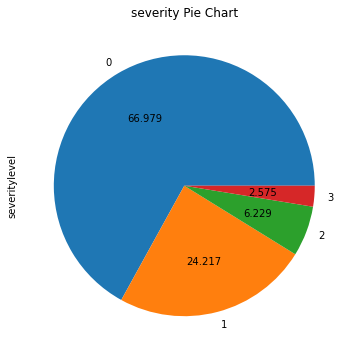

0    134103
1     48487
2     12471
3      5156
Name: severitylevel, dtype: int64

In [10]:
# “III - Berat” Untuk rawat inap dengan tingkat keparahan 3 (dengan major komplikasi dan komorbiditi
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
df['severitylevel'].value_counts().plot(kind='pie',autopct='%.3f')
plt.title('severity Pie Chart')
plt.show()

df['severitylevel'].value_counts()

Berdasarkan output tersebut dapat diketahui bahwa nilai paling tinggi ditunjukkan oleh kelas 0 yaitu "rawat jalan". 
Sub-group tersebut merupakan resource intensity level yang 
menunjukkan tingkat keparahan kasus yang dipengaruhi adanya 
komorbiditas ataupun komplikasi dalam masa perawatan.

Kedua adalah melihat korelasi antara fitur los dan umur. Hal ini bertujuan untuk melihat umur pasien yang lebih banyak dirawat. 

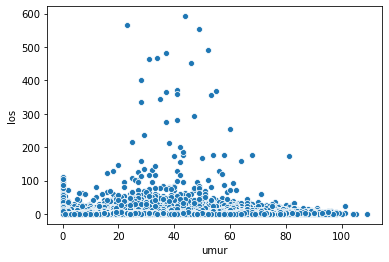

In [11]:
# korelasi antar los dan umur
import seaborn as sns
sns.scatterplot(x="umur", y="los", data=df)

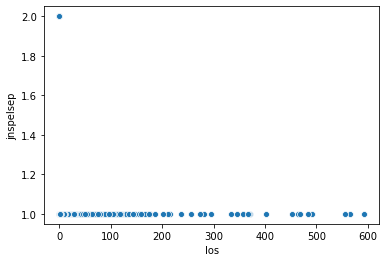

In [12]:
# korelasi antar los dan umur
import seaborn as sns
sns.scatterplot(x="los", y="jnspelsep", data=df)

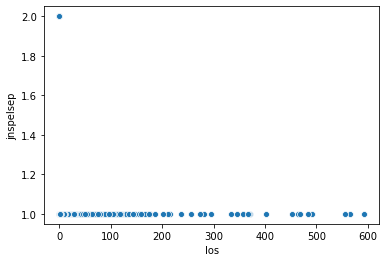

In [13]:
# korelasi antar los dan jnspelsep
import seaborn as sns
sns.scatterplot(x="los", y="jnspelsep", data=df)

jnspelsep 
- 1:rawat inap
- 2:rawat jalan

Setelah melakukan proses binning terhadap lenght of stay (los) yang dibagi menjadi rawat jalan, short stay, medium stay, dan long stay. Kita dapat melihat ada korelasi tidak valid, saat dirawat jalan maka harusnya rawat jalan hanya ada pada koordinat 2, namun dari hasil visualisasi terdapat tingkat pelayanan rawat jalan yang los nya lebih dari 0 hari, atau menginap. 

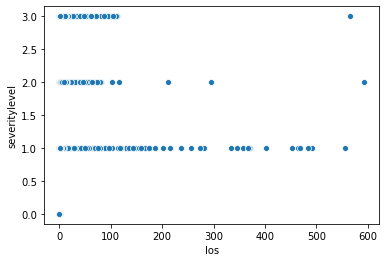

In [14]:

# Korelasi antara fitur los dan severitylevel
import seaborn as sns
sns.scatterplot(x="los", y="severitylevel", data=df)

Korelasi antardata dapat dilihat menggunakan visualisasi data *correlation heatmap* seperti code berikut ini

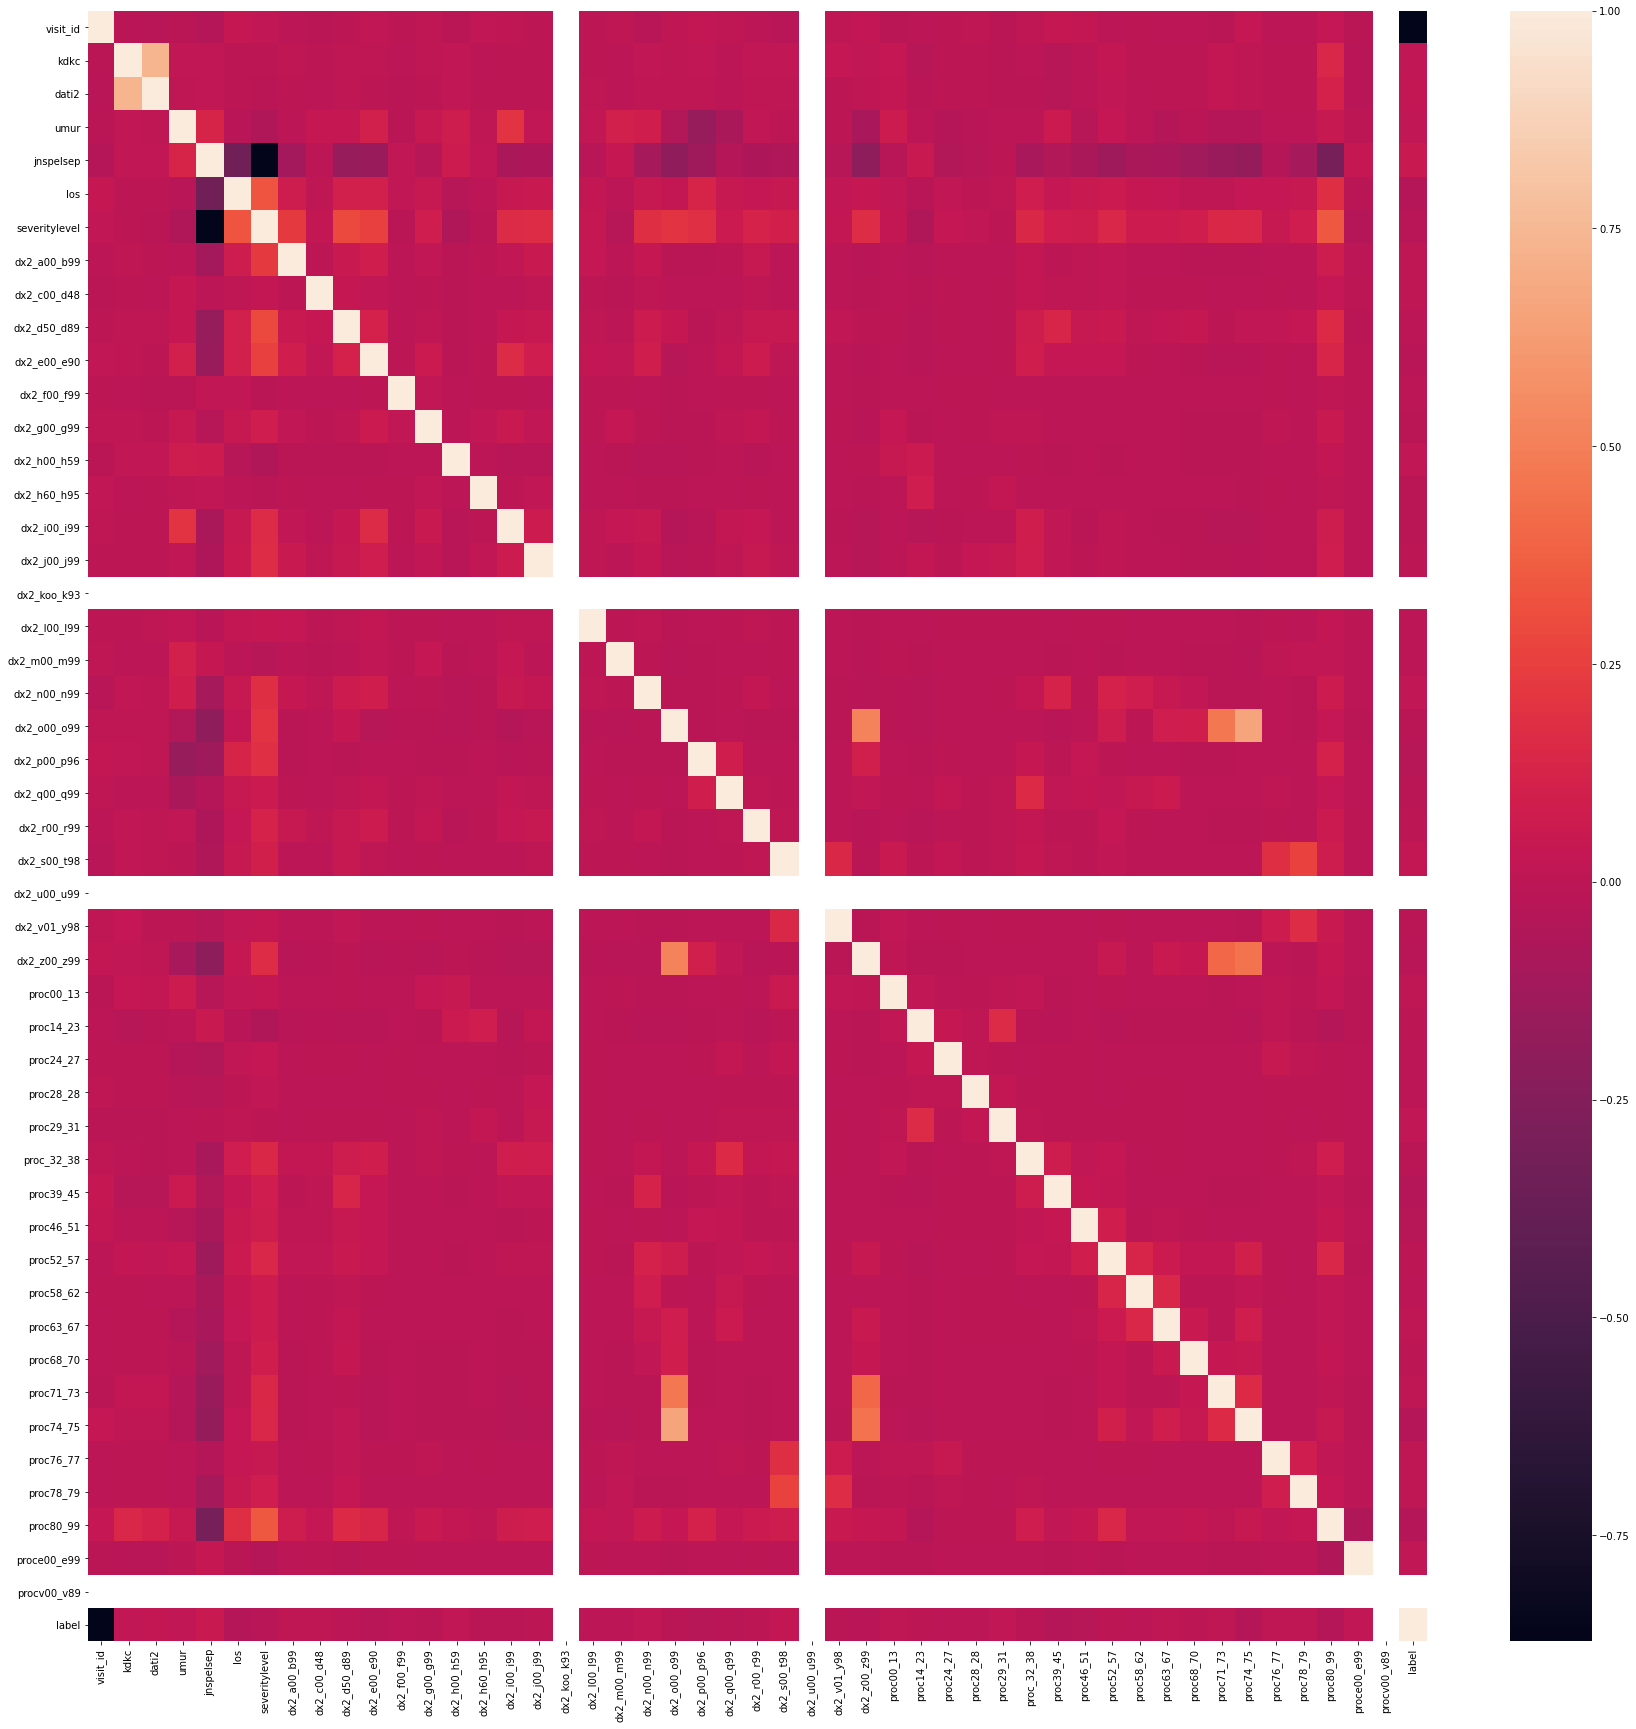

In [15]:
## Tampilkanlah correlation heatmap 
import matplotlib.pyplot as plt
import seaborn as sns

atribut = df.columns
correlations = df[atribut].corr()

fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlations, ax = ax);

Berdasarkan hasil tersebut kita mengetahui keterkaitan yang cukup tinggi ditunjukkan oleh kolom dati2 dan kdkc karena kedua kolom ini memuat informasi yang berkaitan yaitu daerah atau lokasi dari kantor bpjs. Terdapat beberapa nilai 

### Melihat pembagian sampel data label

Data yang digunakan pada kolom **label** menunjkkan kelas fraud dan tidak fraud. Kita dapat melihat pembagian data yang dilakukanan dengan menggunakan visualisasi data pie chart

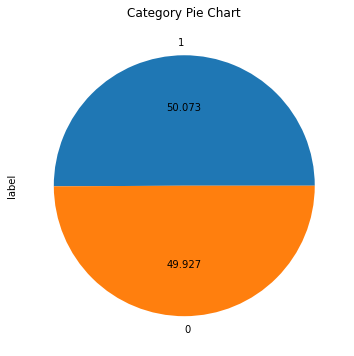

1    100255
0     99962
Name: label, dtype: int64

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
df['label'].value_counts().plot(kind='pie',autopct='%.3f')
plt.title('Category Pie Chart')
plt.show()

df['label'].value_counts()

Berdasarkan visualisasi tersebut dapat dilihat bahwa nilai dengan label 1 memiliki jumlah yang lebih banyak senilai 0.046%

# DATA PREPARATION

Data Preparation atau bisa disebut juga dengan data preprocessing adalah suatu proses/langkah yang dilakukan untuk membuat data mentah menjadi data yang berkualitas. Pada tahapan ini kita melakukan pengolahan (*preprocessing*) untuk menghasilkan data dengan kualitas yang baik melalui beberapa proses yang akan dipilih sesuai dengan kebutuhan penggunaannya.

Pada data understanding sebelumnya, kita melihat bahwa terdapat 53 kolom yang merupakan bagian dari data. Beberapa kolom tersebut tidak kita butuhkan dan dapat kita buang dengan menggunakan fungsi drop. Kita menyertakan kolom apa saja yang tidak kita butuhkan dan *dropping* kolom tersebut. 

In [17]:
df.drop(['visit_id', 'procv00_v89', 'dx2_koo_k93', 'dx2_u00_u99', 'proce00_e99', 'dati2' ], axis=1, inplace=True)

In [18]:
df.columns

Index(['kdkc', 'typeppk', 'jkpst', 'umur', 'jnspelsep', 'los', 'cmg',
       'severitylevel', 'diagprimer', 'dx2_a00_b99', 'dx2_c00_d48',
       'dx2_d50_d89', 'dx2_e00_e90', 'dx2_f00_f99', 'dx2_g00_g99',
       'dx2_h00_h59', 'dx2_h60_h95', 'dx2_i00_i99', 'dx2_j00_j99',
       'dx2_l00_l99', 'dx2_m00_m99', 'dx2_n00_n99', 'dx2_o00_o99',
       'dx2_p00_p96', 'dx2_q00_q99', 'dx2_r00_r99', 'dx2_s00_t98',
       'dx2_v01_y98', 'dx2_z00_z99', 'proc00_13', 'proc14_23', 'proc24_27',
       'proc28_28', 'proc29_31', 'proc_32_38', 'proc39_45', 'proc46_51',
       'proc52_57', 'proc58_62', 'proc63_67', 'proc68_70', 'proc71_73',
       'proc74_75', 'proc76_77', 'proc78_79', 'proc80_99', 'label'],
      dtype='object')

Berdasarkan analisis yang didapatkan, diketahui bahwa fitur umur dan LoS merupakan nilai bertipe numerik dan memiliki persebaran data yang tidak merata. Oleh karena itu akan dilakukan proses binning yaitu mengelompokkan data ke dalam bagian-bagian yang lebih kecil yang disebut bin berdasarkan kriteria tertentu pada kedua fitur tersebut.

Untuk fitur umur akan dibagi menjadi 5 kategori dengan bin yang ditentukan adalah sesuai dengan kategori usia berdasarkan WHO

In [19]:

# binning dataset
import numpy as np  
import math
from sklearn.datasets import load_iris
from sklearn import datasets, linear_model, metrics 
  
batas_bin = [ -1, 2, 11, 20, 61, 120]
kategori = ['satu', 'dua', 'tiga', 'empat', 'lima']
df['umur'] = pd.cut(df['umur'], bins=batas_bin, labels=kategori)


Untuk fitur los yang memiliki hubungan terhadap jnpsplesep yang terkait pada tipe rawat inap atau rawat jalan selanjutnya akan dikelompokkan menjadi 4 kategori

In [20]:
# binning dataset
import numpy as np  
import math
from sklearn.datasets import load_iris
from sklearn import datasets, linear_model, metrics 
  
batas_bin = [-1, 1, 6, 11,800 ]
kategori = ['rawat jalan', 'short stay', 'medium stay', 'long stay']
df['los'] = pd.cut(df['los'], bins=batas_bin, labels=kategori)

Untuk mempermudah pemrosesan data, maka dilakukan pengubahan jenis nilai yang digunakan pada fitur `jkpst`. Sebelumnya fitur `jkpst` bertipe kategorik dan menggunakan nilai L dan P untuk mendefinisikan jenis kelamin pasien. Karena itu, kami mengubah nilai fitur ini dengan nilai biner sehingga menjadi [0, 1] dimana 0 = L dan 1 = P.

In [21]:
df['jkpst'].replace(to_replace=['L', 'P'], value =[0, 1], inplace=True)

Pada tahap data understanding dilakukan pengecekan tipe atribut dari setiap fitur pada data. Dapat dilihat bahwa, terdapat 4 atribut yang bertipe data kategorikal (object64), untuk itu perlu dilakukan transformasi data. 

Fitur dengan tipe kategorikal akan dikumpulkan lalu dipetakan dalam data dummies untuk kemudian ditransformasi menjadi tipe numerik. Kemudian fitur yang sudah diubah, diconcatenate/ digabungkan pada variabel yang bernama bpjs_data_final dengan axis=1.

In [22]:
C = (df.dtypes == 'object')
C2 = (df.dtypes == 'category')
CategoricalVariables = list(C[C].index) + list(C2[C2].index)

Integer = (df.dtypes == 'int64')
Float = (df.dtypes == 'float64')
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

df_kategori = pd.get_dummies(df[CategoricalVariables], columns=CategoricalVariables)
df_numeric = df[NumericVariables]

df_dummy = pd.get_dummies(df[CategoricalVariables], columns=CategoricalVariables)
df_numeric = df[NumericVariables]

df_numeric["id"] = df_numeric.index + 1
df_dummy["id"] = df_dummy.index + 1
bpjs_data_final = pd.merge(df_dummy, df_numeric ,on="id")
bpjs_data_final.drop(['id'], axis=1, inplace=True)
print("Dummy transformation was successful")


<ipython-input-22-e554769bf951>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["id"] = df_numeric.index + 1


Dummy transformation was successful


Selanjutnya, dilakukan pengecekan kebersihan data. Data cleaning pada proses data mining dapat mengurangi jumlah dan kompleksitas data. Salah satu aspek yang menyebabkan kualitas data menjadi kurang baik adalah terjadinya missing value atau terdapat data yang hilang pada dataset yang digunakan. Untuk mengantisipasi hal tersebut terlebih dahulu dilakukan pemeriksaan apakah terdapat data yang hilang (missing) atau bernilai kosong. Pemeriksaan dilakukan menggunakan fungsi pada python yaitu df.isnull().

In [23]:

C = (bpjs_data_final.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (bpjs_data_final.dtypes == 'int64')
Float = (bpjs_data_final.dtypes == 'float64')
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

Missing_Percentage = (df.isnull().sum()).sum()/np.product(df.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 0.0 %


Adapun hasil yang didapatkan dari pemeriksaan tersebut adalah bahwa pada dataset yang digunakan tidak terdapat missing value.

Berikutnya kita menggunakan visualisasi data dengan memanfaatkan fungsi hist untuk menampilkan histogram untuk semua atribut. Histogram dalam tampilan bentuk grafis akan menunjukkan distribusi data secara visual atau seberapa sering suatu nilai yang berbeda itu terjadi dalam suatu kumpulan data (dataframe). Histogram menunjukkan distribusi data dengan memplot frekuensi kejadian dalam suatu rentang. Tampilan histogram berikut berbeda dengan yang sebelumnya, karena terdapat penambahan fitur sebagai akibat dari transformasi fitur yang dilakukan.

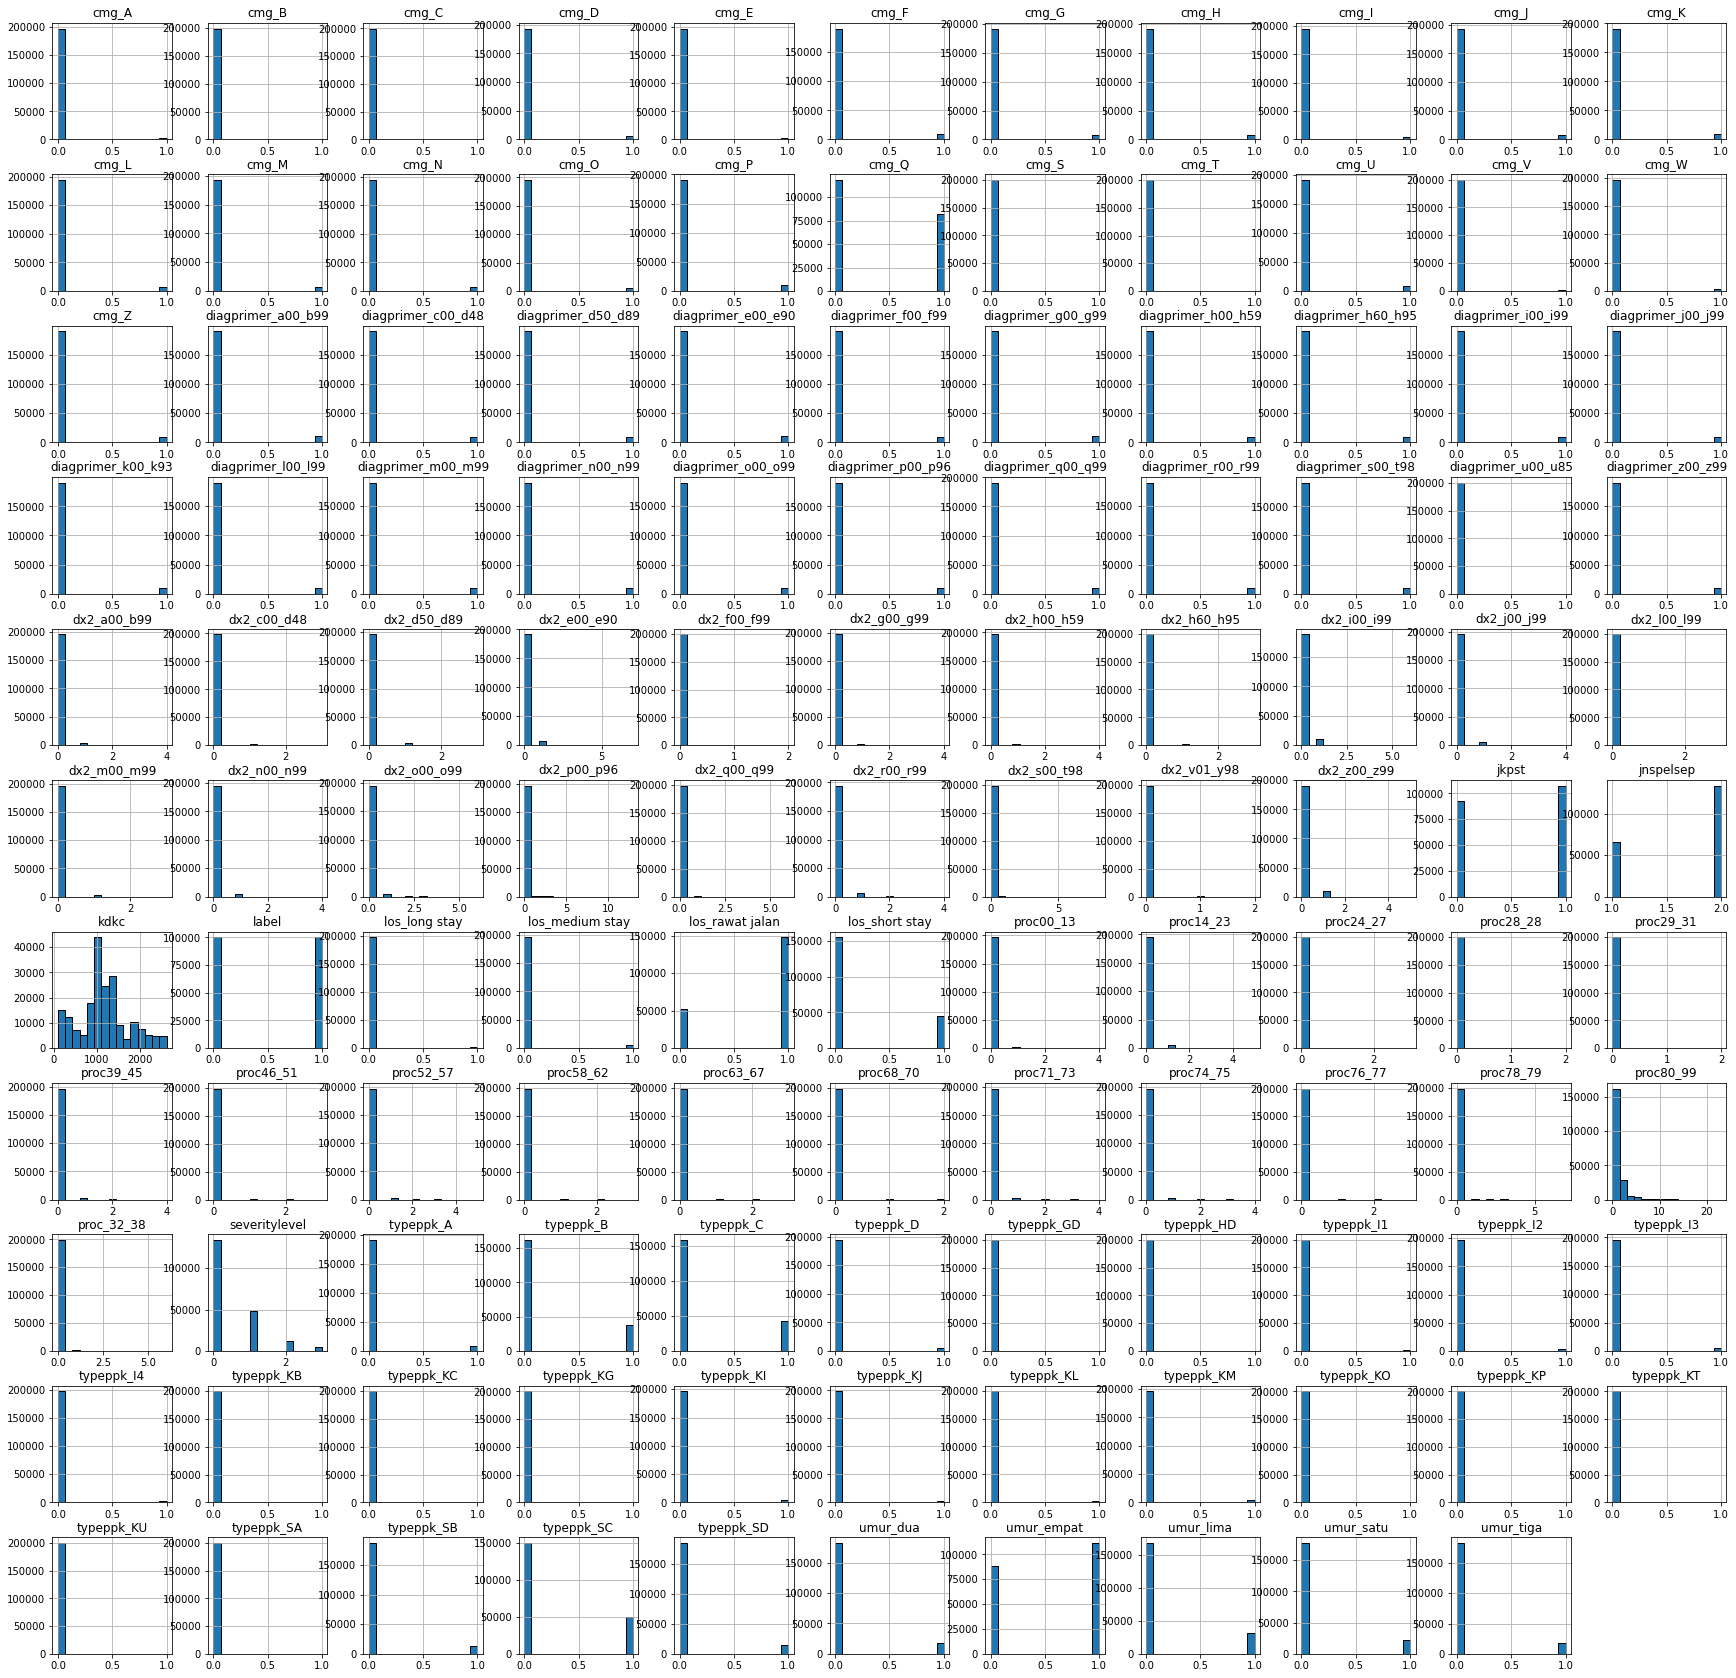

In [24]:
## Tampilkan histogram untuk semua atribut
bpjs_data_final.hist(edgecolor = 'black', bins = 15, figsize = (30, 30));

Berdasarkan hasil histogram yang ditunjukkan pada output tersebut, kita dapat melihat terdapat lebih banyak atribut yang memiliki nilai yang bervariasi, seperti typeppk_B,typeppk_C, kdck, label, dst . Namun persebaran atau distribusi data tidak tersebar secara konsisten dan tidak seimbang.

Pada tahap ini, akan dilakukan pengecekan keterkaitan setiap fitur pada data yang digunakan. Keterkaitan (korelasi) tersebut dapat dilihat dengan memvisualisasikan data menggunakan heatmap ataupun scatter plot. Tampilan correlation heatmap berikut berbeda dengan yang sebelumnya, karena terdapat penambahan fitur sebagai akibat dari transformasi fitur yang dilakukan.

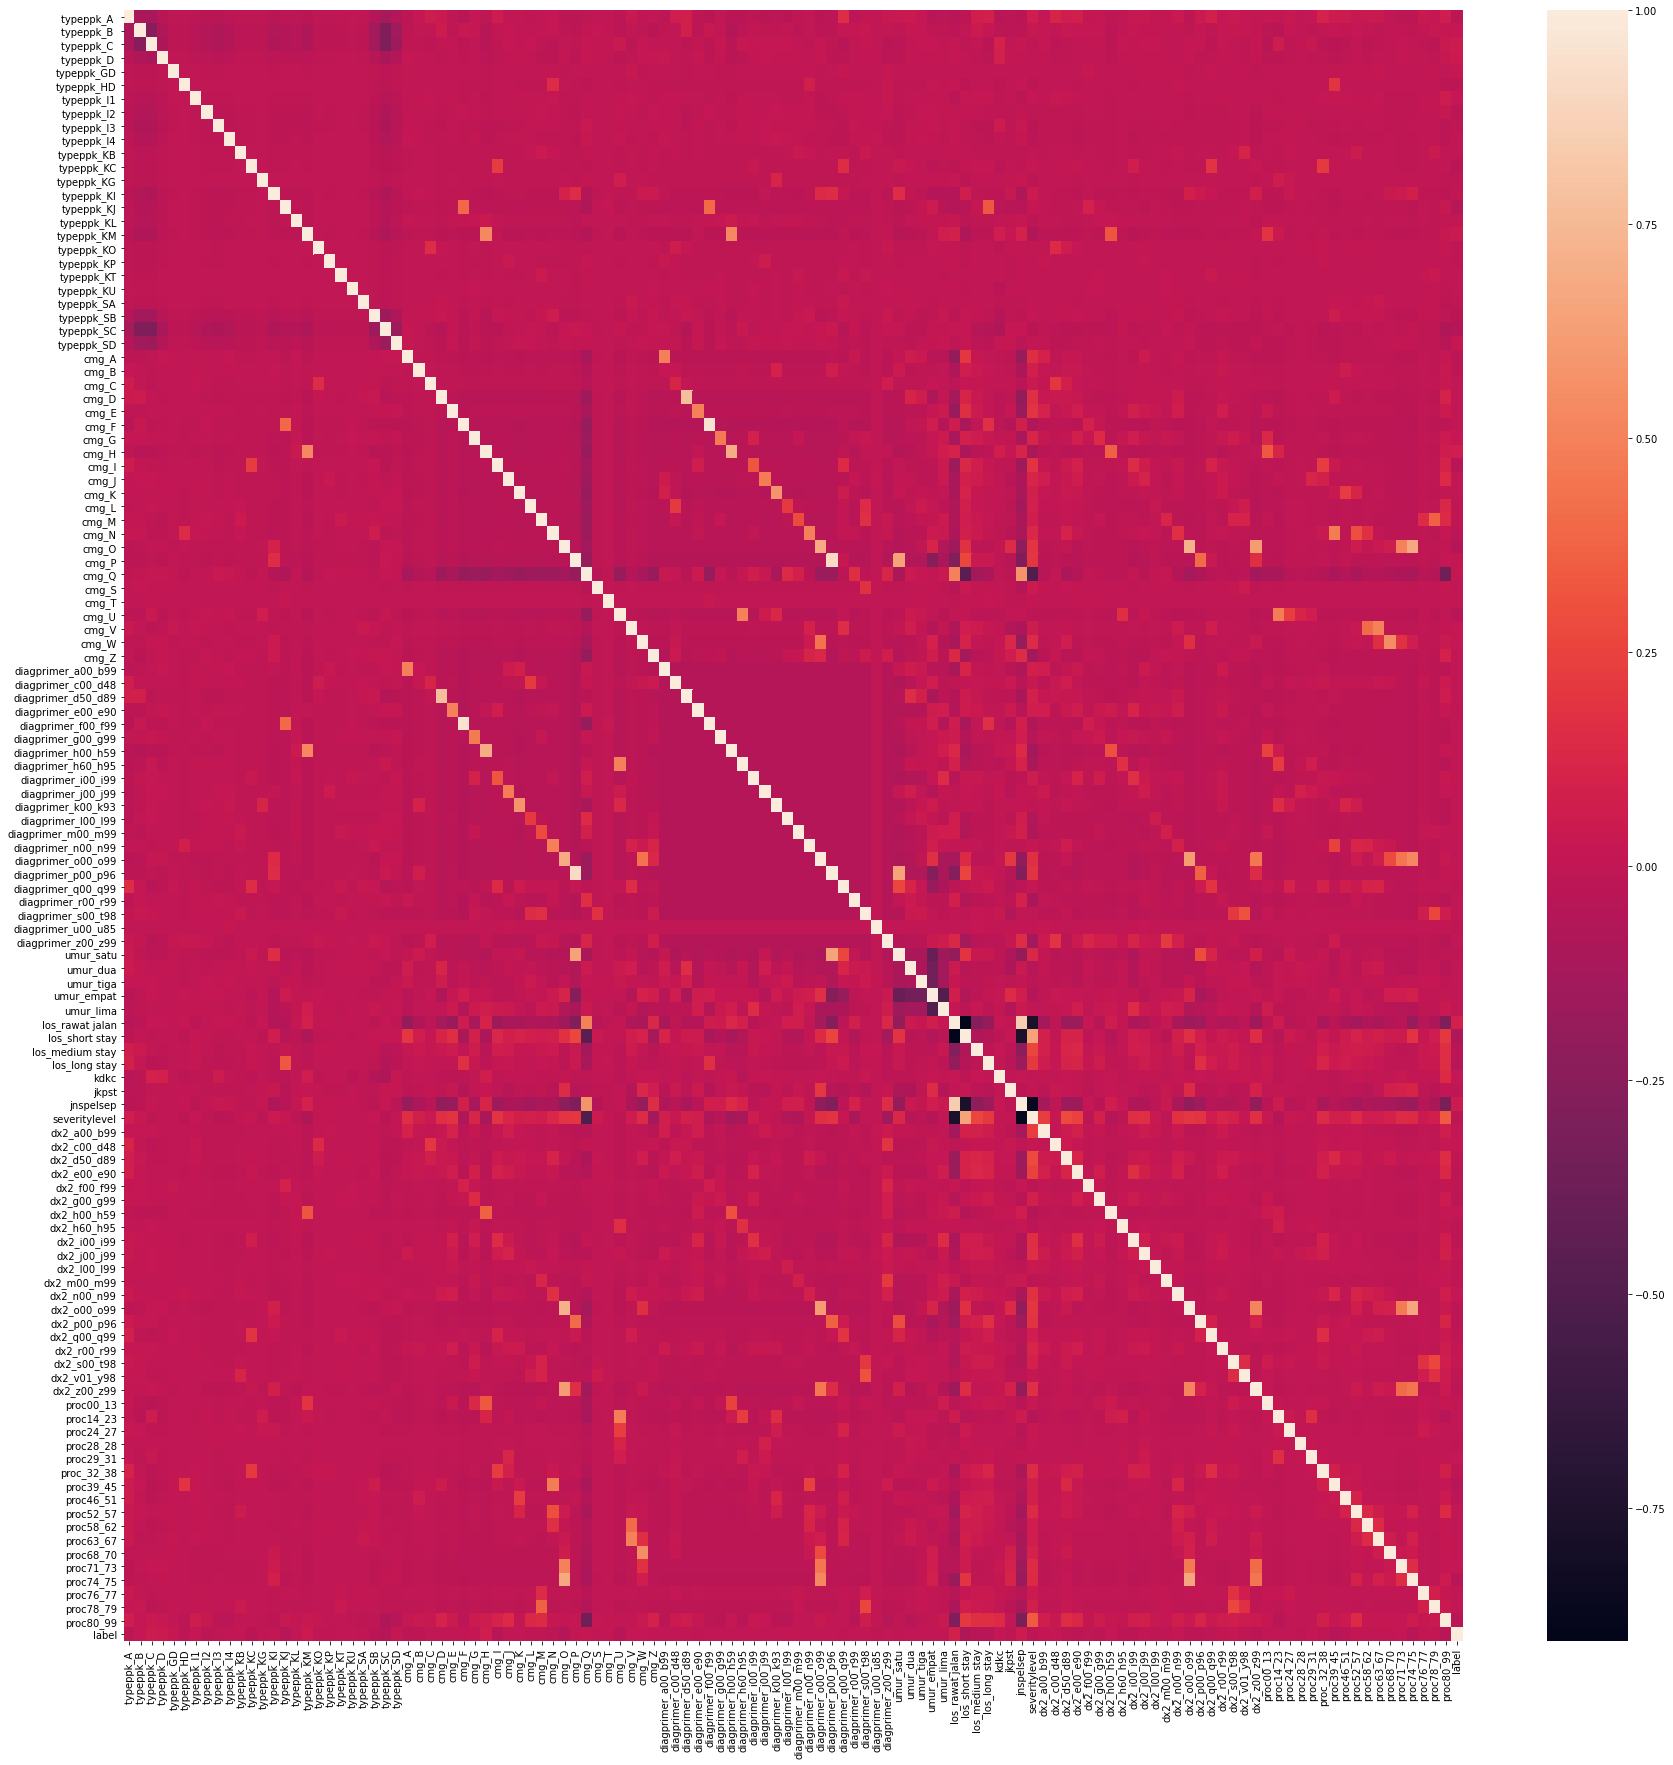

In [25]:
## Tampilkanlah correlation heatmap 
import matplotlib.pyplot as plt
import seaborn as sns

atribut = bpjs_data_final.columns
correlations = bpjs_data_final[atribut].corr()

fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlations, ax = ax);

Pada tahap ini, atribut yang sebelumnya memiliki nilai =1 (tidak memiliki korelasi dengan fitur lain) yaitu dx2_koo_k93, dx2_u00_u99 dan procv00_v89, telah teratasi. Semua fitur dalam data telah berkorelasi satu sama lain dengan tingkat ketergantungan yang berbeda. Semakin terang warna dari relasi antar fitur maka semakin kuat pengaruh atribut satu sama lain.

In [26]:
# data.drop(['label'], axis=1, inplace=True)
X = bpjs_data_final.iloc[:,:-1].values
y = bpjs_data_final.iloc[:, -1].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
# #Feature selection sebelum dinormalisasi

# from sklearn.feature_selection import SelectKBest, chi2, f_regression


# bestfeatures = SelectKBest(score_func=chi2 ,k = 10)
# fit = bestfeatures.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)

# featureScores = pd.concat([dfcolumns, dfscores], axis=1)
# featureScores.columns = ['Specs', 'Score']
# print(featureScores.nlargest(10, 'Score'))

Penerapan standarisasi berfokus pada mengubah data mentah menjadi informasi yang dapat digunakan sebelum dianalisis. Merupakan teknik yang menskalakan data sehingga memiliki mean = 0 dan standar deviasi =1. Standarisasi dilakukan dengan menggunakan fungsi standardscaler dan diperoleh hasil standarisasi sebagai berikut.

In [28]:
# standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler


# define standard scaler
scaler = StandardScaler()
# transform data
X = scaler.fit_transform(X)

print(X)
# transform data

[[-0.21087184 -0.4873673  -0.51753857 ... -0.03451165 -0.07424171
  -0.65076355]
 [-0.21087184 -0.4873673   1.93222313 ... -0.03451165 -0.07424171
   2.42227887]
 [-0.21087184  2.05184056 -0.51753857 ... -0.03451165 -0.07424171
  -0.65076355]
 ...
 [-0.21087184 -0.4873673  -0.51753857 ... -0.03451165 -0.07424171
  -0.65076355]
 [-0.21087184  2.05184056 -0.51753857 ... -0.03451165 -0.07424171
   0.11749706]
 [-0.21087184 -0.4873673  -0.51753857 ... -0.03451165 -0.07424171
  -0.65076355]]


# ANALISIS / MODELING

Selanjutnya data dibagi menjadi 2 bagian, yaitu data latih sebanyak 70% dan data uji sebanyak 30% dengan potongan kode dibawah ini. Data latih digunakan dalam membangun model dan data uji akan digunakan dalam menguji akurasi model yang telah dibangun.

In [29]:
# implementing train-test-split

from sklearn.model_selection import KFold, cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 60)
print(X_train.shape)

(140151, 119)


Pembagian data berhasil dilakukan sehingga diperoleh data latih sebesar 140151 dan data uji sebesar 119

Pemodelan akan dilakukan dengan menggunakan algoritma Random Forest Classifier (RFC), dengan library sklearn. Adapun pembuatan model RFC dapat dilakukan dengan potongan kode dibawah ini.

In [30]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
# random forest model creation
rfc =  RandomForestClassifier(random_state=5, n_estimators=50, )
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

Kemudian dilakukan pengecekan score akurasi dari data latih dan data uji yang dimiliki dengan potongan code berikut

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
train_accuracy= rfc.score(X_train, y_train)
test_accuracy= rfc.score(X_test, y_test)
print(train_accuracy) 
print(test_accuracy)

0.9392726416507909
0.6764059534512037


## TUNING HYPERPARAMETERS


Hyperparameter tuning adalah proses untuk menemukan nilai hyperparameter. Tujuannya adalah untuk menemukan nilai hyperparameter yang dapat menghasilkan model dengan performa yang paling baik.

Pada pemodelan ini akan dilakukan teknik tuning hyper parameter yaitu kita dapat 
melakukan pengaturan pada algoritma dengan mengubah parameter untuk menemukan 
kinerja yang optimal. Jumlah estimator akan ditunjukkan dengan nilai start dan stop yang 
telah ditentukan, kemudian hyperparameter akan ditemukan dengan menggunakan 
fungsi random_grid. Hasil hyperparameter tersebut kemudiana akan digunakan sebagai 
parameter prediksi dengan fungsi RandomizedSearchCV. 
Pada tahap ini, dilakukan pendefinisian informasi mengenai n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf, dan bootstrap

In [32]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [20, 65, 110, 155, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 15, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Kemudian untuk penentuan hyperparameters terbaik, dilakukan dengan menggunakan grid acak pada model.Untuk itu terlebih dahulu dilakukan pembuatan model dasar, kemudian menggunakan 3 fold cross validation dan pencarian parameter dengan sekitar 100 kombinasi berbeda untuk kemudian disesuaikan dengan model.

In [33]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.model_selection import RandomizedSearchCV 
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.8min finished


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, verbose=2)

Kemudian model prediksi rfc yang dihasilkan dipetakan dalam variabel baru yang berna,a rfc_predict_tunning

In [34]:
rfc_predict_tunning = rf_random.predict(X_test)

Kemudian kembali dilakukan pengecekan score akurasi dari data latih dan data uji yang dimiliki setelah dilakukan parameter tuning dan diperoleh hasil sebagai berikut: 

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
train_accuracy= rf_random.score(X_train, y_train)
test_accuracy= rf_random.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

0.8002154818731225
0.6867612293144209


Prediksi yang dilakukan 
menghasilkan akurasi untuk data train dan data test masing-masing sebesar 0.81 dan 
0.68

# EVALUATION 


Pada tahap ini akan dilakukan evaluasi terhadap model yang telah dibangun. 

In [36]:
# rfc_cv_score = cross_val_score(rf_random, X, y, scoring='roc_auc')

Terlebih dahulu dilakukan pengecekan hasil/ score akurasi yang dipetakan dalam sebuah matrik. Disini, kami menggunakan confusion matrix untuk itu terlebih dahulu perlu dilakukan pengimportan library untuk matriks Dan hasil dari Confusion Matrix, Classification Report, All AUC Scores, dan Mean AUC Score adalah sebagai berikut

In [37]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict_tunning))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict_tunning))
print('\n')
print("=== All AUC Scores ===")
# print(rfc_cv_score)
print('\n')
# print("=== Mean AUC Score ===")
# print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[20169  9752]
 [ 9063 21082]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.69      0.67      0.68     29921
           1       0.68      0.70      0.69     30145

    accuracy                           0.69     60066
   macro avg       0.69      0.69      0.69     60066
weighted avg       0.69      0.69      0.69     60066



=== All AUC Scores ===




Berdasarkan hasil yang diperoleh dari pembangunan model dengan menggunakan algoritma 
RFC telah menghasilkan model dengan akurasi cukup baik dengan score > 0.5 dan yang 
memenuhi standar dan ketentuan pembangunan proyek. Model yang dibangun telah cukup 
baik dalam menerapkan algoritma RFC untuk mendeteksi kecurangan pada layanan BPJS.
Untuk data tidak fraud diperoleh precision = 0.69, recall = 0.67, dan f1-score = 0.68. Sementara untuk data fraud diperoleh precision = 0.68, recall = 0.70, dan f1-score = 0.69

Evaluasi dilakukan dengan menggunakan algoritma RFC dimana predicted label dan true label dibandingkan atau dilihat korelasinya melalui visualisasi heatmap.

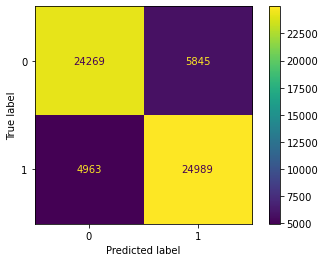

In [38]:
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_random, X_test, rfc_predict)

Karena penelitian ini merupakan binary classification, maka output akhir dari pemodelan ini 
adalah binary [0, 1], dimana 0 berarti terdapat tidak fraud dan 1 artinya terdapat fraud. 
Berdasarkan heatmap yang diperoleh dapat dilihat hubungan predicted lable dengan true 
lable dalam menghasilkan data valid dan tidak valid. Data valid yang diperoleh berupa: data 
yang diprediksi tidak fraud dan benar tidak fraud berjumlah 24170 dan data yang diprediksi 
fraud dan benar fraud berjumlah 25075. Sementara untuk data tidak valid yang diperoleh 
berupa: data yang diprediksi tidak fraud tetapi kebenarannya adalah fraud berjumlah 5944
dan data yang diprediksi fraud tetapi kebenarannya adalah tidak fraud berjumlah 4877.


In [ ]:

# # explore random forest number of trees effect on performance
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.ensemble import RandomForestClassifier
# from matplotlib import pyplot
 


# # evaluate a given model using cross-validation
# def evaluate_model(model, X, y):
# 	# define the evaluation procedure
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# 	# evaluate the model and collect the results
# 	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# 	return scores
 

# # evaluate the models and store results
# results, names = list(), list()
# for name, model in rf_random.items():
# 	# evaluate the model
# 	scores = evaluate_model(model, X, y)
# 	# store the results
# 	results.append(scores)
# 	names.append(name)
# 	# summarize the performance along the way
# 	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

# SAVING MODEL

Semua tahap diatas mulai dari data understanding, data preparation, pemodelan dan evaluasi kemudian disimpan dalam sebuah file bernama `model.sav` untuk kemudian dapat disimpan dalam lokal pengguna dan digunakan dalam development

In [ ]:
# save the model to disk
import nltk
import pickle
filename = './drive/MyDrive/dami/model.sav'
pickle.dump(rf_random, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)